In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

### 讀入資料庫

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_train.shape

(60000, 10)

### 平常CNN辨識RGB三個channel但我們現在只有黑白一個Channel, 所以(28,28) 改成 (28,28,1)

In [5]:
x_train = x_train.reshape(60000,28,28,1)/255
x_test = x_test.reshape(10000,28,28,1)/255

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Step1打造函數學習機(CNN)

In [7]:
#Build LetNet model with Keras
def LetNet(width, height, depth, classes):
    # initialize the model
    model = Sequential()

    # first layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), filters=16, kernel_size=(5,5), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # second layer, convolution and pooling
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Third layer, convolution and pooling
    model.add(Conv2D(filters=64, kernel_size=(5,5), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Fully connection layer x2
    model.add(Flatten())
    model.add(Dense(128,activation = 'relu'))
    model.add(Dense(64,activation = 'relu'))

    # softmax classifier
    model.add(Dense((classes), activation="softmax"))

    return model

In [8]:
model = LetNet(28,28,1,10)
model.summary()

#第一層  [3*3(權重)+1(bias)] * 16 = 160 
#第二層  [16*3*3(權重)+1(bias)] * 32 = 4640
#第三層 [32*3*3(權重)+1(bias)]* 64 = 18496


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [9]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.005), metrics=["accuracy"]) #losst function嘗試用分類熵

### Step 2. Fit

In [10]:
model.fit(x_train, y_train, batch_size=128, epochs=16)

Train on 60000 samples
Epoch 1/16
60000/60000 [==============================] - 146s 2ms/sample - loss: 1.6113 - accuracy: 0.4624
Epoch 2/16
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.8651 - accuracy: 0.6729
Epoch 3/16
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.7446 - accuracy: 0.7200
Epoch 4/16
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.6823 - accuracy: 0.7464
Epoch 5/16
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.6367 - accuracy: 0.7653
Epoch 6/16
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.5987 - accuracy: 0.7802
Epoch 7/16
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.5700 - accuracy: 0.7927
Epoch 8/16
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.5454 - accuracy: 0.8002
Epoch 9/16
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.5217 - accuracy: 0.8119
Epoch

### Step 3. 預測

In [11]:
result = model.predict_classes(x_test)

In [15]:
def predict(n):
    print('CNN預測是:', class_names[result[n]])
    x = x_test[n].reshape(28,28)
    plt.imshow(x, cmap="Greys")

CNN預測是: Shirt


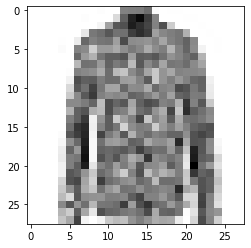

In [18]:
predict(101)

In [22]:
from ipywidgets import interact_manual

In [24]:
interact_manual(predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.predict(n)>

In [26]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 9s 945us/sample - loss: 0.4430 - accuracy: 0.8415


In [38]:
loss, acc = score
print("測試資料正確率 = ", round(acc*100,2), "%")

測試資料正確率 =  84.15 %


### 保存訓練模型

In [40]:
model.save("hw2_CNN.h5")